# Local Outlier Factor

This is a density-based anomaly detection method that identifies outliers based on local density. Local density represents how crowded the area around a point is. We consider outliers to be points which are significantly less dense than their neighbors. This method is effective for non-uniformly distributed data but is sensitive to the choice of parameters (n_neightbors) and may be computationally expensive. We find that n_neighbors=20 and contamination=0.005 are the parameters that work best.

In [15]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

In [16]:
data = pd.read_csv('intc_data.csv')

In [17]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)
print(data['Date'])

0       1985-01
1       1985-01
2       1985-01
3       1985-01
4       1985-01
         ...   
7559    2014-12
7560    2014-12
7561    2014-12
7562    2014-12
7563    2014-12
Name: Date, Length: 7564, dtype: object


C:\Users\Tejas Srivatsav\AppData\Local\Temp\ipykernel_31460\3785880456.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['Date'] = pd.to_datetime(data['Date'], utc=True).dt.to_period('M').astype(str)


In [18]:
# Indicators to consider
indicators = ['Volume', 'SMA_50', 'RSI', 'MACD', 'Upper_BB', 'Lower_BB']
# Normalize the features
scaler = MinMaxScaler()
data[indicators] = scaler.fit_transform(data[indicators])

In [19]:
# Perform LOF
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.005) 
outlier_labels = clf.fit_predict(data[indicators])

# Identify outliers
outliers = data[outlier_labels == -1]

In [20]:
print(outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 390 to 7446
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          38 non-null     object 
 1   Open          38 non-null     float64
 2   High          38 non-null     float64
 3   Low           38 non-null     float64
 4   Close         38 non-null     float64
 5   Volume        38 non-null     float64
 6   Dividends     38 non-null     float64
 7   Stock Splits  38 non-null     float64
 8   Return        38 non-null     float64
 9   SMA_50        38 non-null     float64
 10  EMA_20        38 non-null     float64
 11  WMA_30        38 non-null     float64
 12  RSI           38 non-null     float64
 13  Upper_BB      38 non-null     float64
 14  Lower_BB      38 non-null     float64
 15  MACD          38 non-null     float64
 16  Signal_Line   38 non-null     float64
dtypes: float64(16), object(1)
memory usage: 5.3+ KB
None


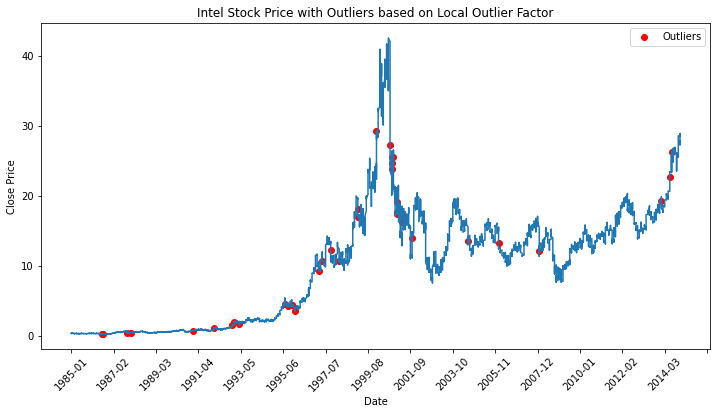

In [21]:
# Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.scatter(outliers['Date'], outliers['Close'], color='red', label='Outliers')
plt.title('Intel Stock Price with Outliers based on Local Outlier Factor')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(25))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

This method finds data points spread throughout the period in consideration. The clear trend is that these points are at times of sudden rise or fall in the stock price.